needs matplotlib and shapley
# postAAR

Eine kurze Erklärung des genutzten Verfahrens, um aus Punktwolken (Pfostenlöcher, etc.) mögliche Rechtecke und Gebäude zu erhalten

In diesem Beispiel werden wir nach Rechtecken mit folgender minimaler Seitenlänge und maximaler Seitenlänge und einer Abweichung von perfekten Rechtecken.
Damit werden mögliche Häuser entdeckt.
Als Datensatz wird 'datasets/pfahltest.txt' genutzt

In [59]:
maximum_length_of_side = 3
minimum_length_of_side = 1.5
max_area_diff = 0.1

Zuerst den Datensatz zum Zeigen laden

In [60]:
posts = []

with open("datasets/pfahltest.txt", 'r') as datafile:
    index = 0
    for line in datafile:
        data = line.split()
        try:
            posts.append([index, float(data[0]), float(data[1])])
            index += 1
        except ValueError:
            pass
posts

[[0, 499.8, 120.0],
 [1, 501.1, 120.4],
 [2, 502.9, 120.0],
 [3, 503.3, 120.0],
 [4, 505.3, 120.2],
 [5, 506.0, 120.1],
 [6, 507.1, 119.7],
 [7, 499.8, 121.7],
 [8, 501.2, 122.0],
 [9, 502.3, 122.5],
 [10, 503.2, 122.0],
 [11, 504.8, 121.6],
 [12, 505.7, 122.2],
 [13, 507.2, 122.0],
 [14, 499.8, 123.6],
 [15, 500.8, 124.4],
 [16, 502.4, 123.7],
 [17, 503.6, 123.7],
 [18, 504.4, 124.4],
 [19, 506.3, 124.5],
 [20, 506.9, 124.0],
 [21, 504.0, 119.6],
 [22, 504.0, 120.7],
 [23, 504.5, 122.0],
 [24, 504.5, 123.2],
 [25, 504.7, 123.9],
 [26, 504.5, 125.5],
 [27, 504.5, 126.5],
 [28, 506.5, 119.5],
 [29, 506.5, 120.7],
 [30, 506.9, 121.9],
 [31, 506.5, 122.7],
 [32, 506.8, 124.0],
 [33, 506.0, 125.6],
 [34, 506.6, 126.9],
 [35, 508.9, 119.3],
 [36, 508.6, 120.7],
 [37, 508.8, 122.4],
 [38, 508.5, 123.1],
 [39, 508.5, 124.8],
 [40, 508.9, 125.9],
 [41, 508.5, 126.7],
 [42, 504.9, 119.7],
 [43, 504.2, 120.2],
 [44, 503.1, 121.6],
 [45, 502.5, 122.0],
 [46, 501.8, 123.0],
 [47, 500.9, 123.8],
 [

Um die Punktwolke darzustellen benutzen wir matplotlib([https://matplotlib.org/])

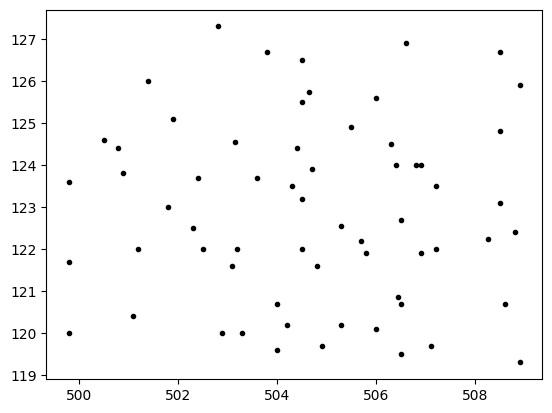

In [67]:
import matplotlib.pyplot as plt

id, x, y = zip(*posts)
plt.plot(x, y, '.', color='black')

Der Algorithmus teilt zuerst das Feld in Fenster ein, um die Komplexität der Berechnung zu verringern (add link - sliding window).
Die Seitengröße der Fenster ist 3 * die maximale Seitenlänge der gesuchten Rechtecke

In [62]:
import src.script.algorithm.helper as hlp

windows = hlp.buildWindows(posts, maximum_length_of_side)

len(windows)

9

Die Punkte und die jeweiligen Fenster

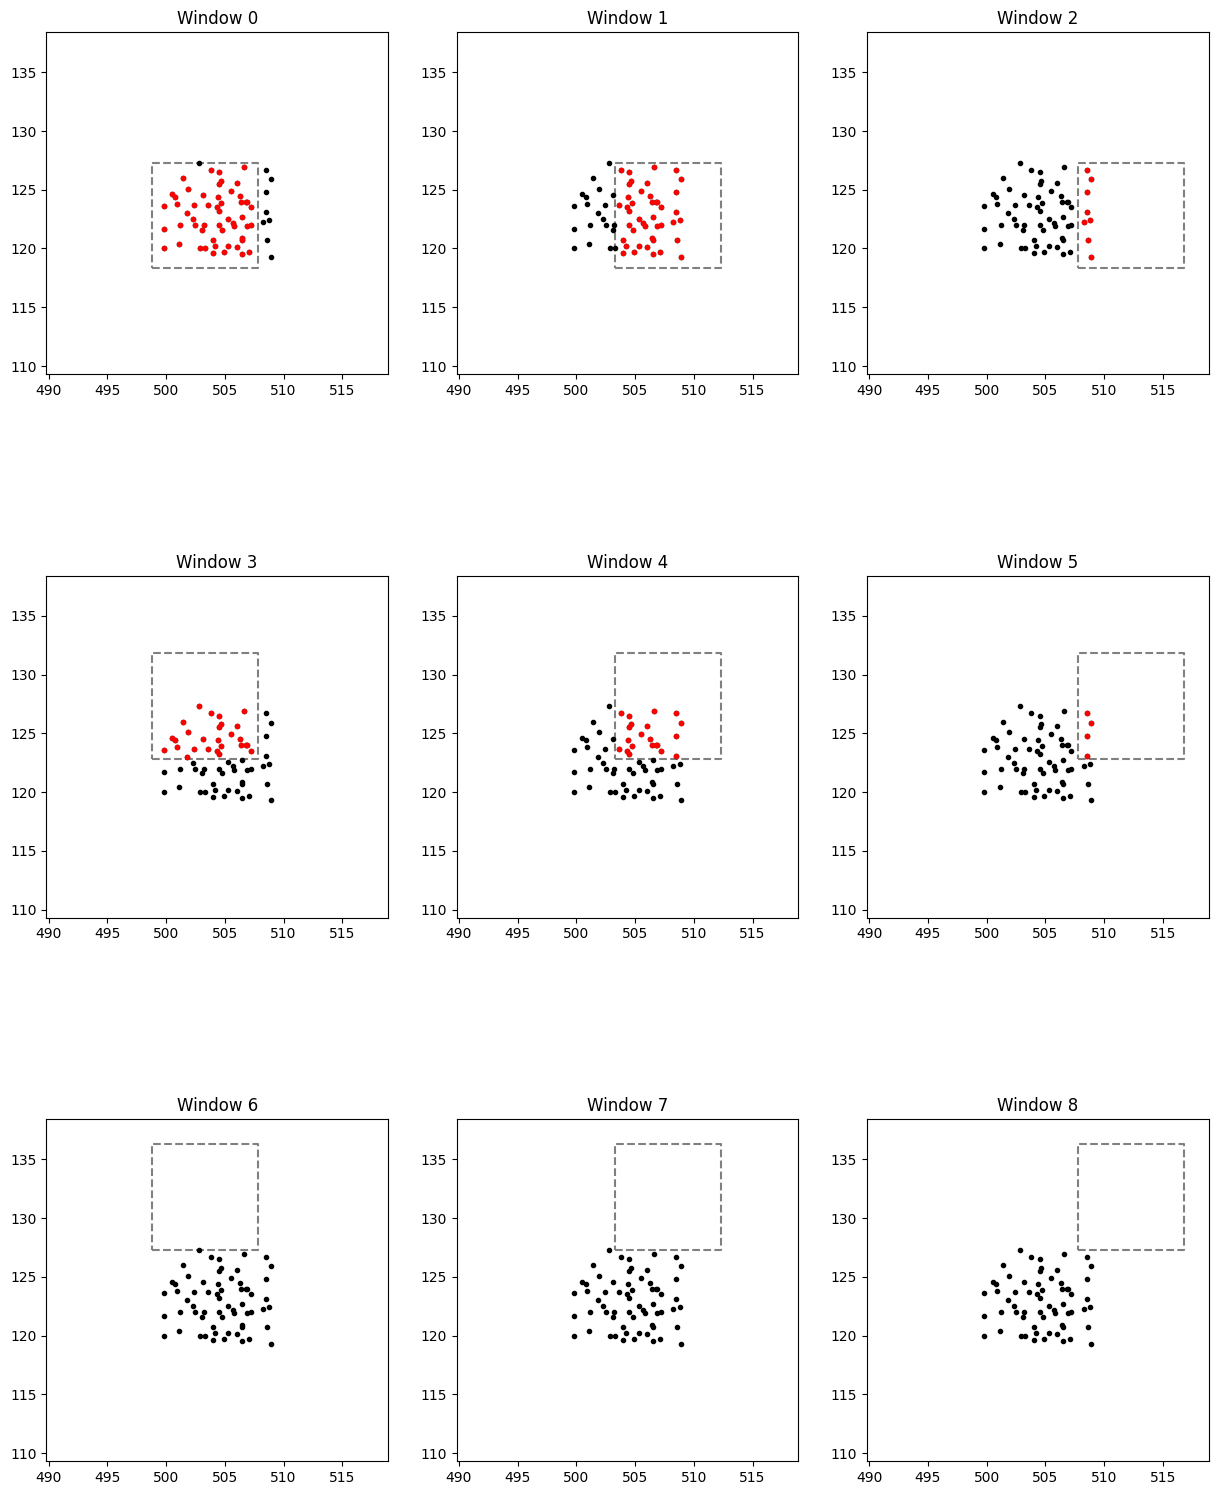

In [63]:
number_per_row = 3
fig, axs = plt.subplots((0 if len(windows)%number_per_row==0 else 1) + len(windows)//number_per_row, number_per_row, figsize=(number_per_row*5, (1 + len(windows)//number_per_row)*5))

min_value_x = min([post[1] for post in posts]) - 1
min_value_y = min([post[2] for post in posts]) - 1
max_value_x = max([post[1] for post in posts]) + 1
max_value_y = max([post[2] for post in posts]) + 1

max_diff = max(max_value_x-min_value_x, max_value_y-min_value_y)

window_x = min_value_x
window_y = min_value_y

window_size = 3 * maximum_length_of_side

window_number = 0
while window_y < max_value_y:
    window_x = min_value_x
    while window_x < max_value_x:
        x = [window_x, window_x + window_size, window_x + window_size, window_x, window_x]
        y = [window_y, window_y, window_y + window_size, window_y + window_size, window_y]
        axs[window_number//number_per_row, window_number%number_per_row].plot(x, y, '--', color='gray')
        axs[window_number//number_per_row, window_number%number_per_row].set_xlim([min_value_x - window_size, min_value_x + max_diff + window_size])
        axs[window_number//number_per_row, window_number%number_per_row].set_ylim([min_value_y - window_size, min_value_y + max_diff + window_size])
        axs[window_number//number_per_row, window_number%number_per_row].set_aspect("equal")
        window_number += 1
        window_x += window_size/2
    window_y += window_size/2

window_number = 0
for window in windows:
    _, x, y = zip(*posts)
    axs[window_number//number_per_row, window_number%number_per_row].plot(x, y, '.', color='black')

    if len(window) > 0:
        _, x, y = zip(*list(filter(lambda post: post[0] in window, posts)))
        axs[window_number//number_per_row, window_number%number_per_row].plot(x, y, '.', color='red')

    axs[window_number//number_per_row, window_number%number_per_row].set_title('Window ' + str(window_number))

    window_number += 1

In diesen Fenstern werden nun die möglichen Rechtecke gesucht und als eine Liste mit einzigartigen viereckigen Polynomen zurückgegeben

In [64]:
import shapely
import src.script.algorithm.algorithm as alg

found_rects = alg.find_rects(windows, posts, maximum_length_of_side, minimum_length_of_side, max_area_diff, number_of_computercores=1)

found_rects

Calculating rects 100% - (0.293s)


[[[51, 22, 45, 17, 51], [17, 22, 45, 51, 51]],
 [[42, 23, 13, 6, 42], [6, 13, 23, 42, 42]],
 [[56, 50, 5, 36, 56], [5, 36, 50, 56, 56]],
 [[53, 46, 44, 24, 53], [24, 44, 46, 53, 53]],
 [[45, 16, 14, 7, 45], [7, 14, 16, 45, 45]],
 [[32, 30, 11, 25, 32], [11, 25, 30, 32, 32]],
 [[52, 20, 13, 11, 52], [11, 13, 20, 52, 52]],
 [[30, 11, 42, 6, 30], [6, 11, 30, 30, 42]],
 [[49, 36, 37, 31, 49], [31, 36, 37, 49, 49]],
 [[34, 27, 25, 20, 34], [20, 25, 27, 34, 34]],
 [[26, 19, 51, 17, 26], [17, 19, 26, 26, 51]],
 [[51, 44, 21, 29, 51], [21, 29, 44, 51, 51]],
 [[37, 36, 49, 31, 37], [31, 36, 37, 37, 49]],
 [[53, 52, 10, 46, 53], [10, 46, 52, 53, 53]],
 [[52, 50, 43, 45, 52], [43, 45, 50, 52, 52]],
 [[30, 25, 10, 4, 30], [4, 10, 25, 30, 30]],
 [[59, 32, 12, 24, 59], [12, 24, 32, 59, 59]],
 [[50, 44, 3, 5, 50], [3, 5, 44, 50, 50]],
 [[21, 10, 51, 5, 21], [5, 10, 21, 21, 51]],
 [[34, 32, 25, 27, 34], [25, 27, 32, 34, 34]],
 [[12, 10, 3, 5, 12], [3, 5, 10, 12, 12]],
 [[51, 10, 21, 5, 51], [5, 10, 21

Die gefundenen 'Rechtecke'

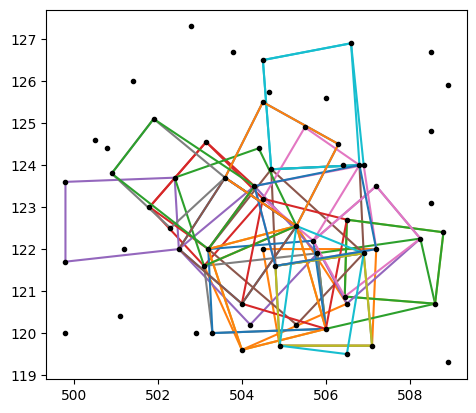

In [65]:
for rect in found_rects:
    x, y = rect.polygon.exterior.coords.xy
    plt.plot(x, y)

_, x, y = zip(*posts)
plt.plot(x, y, '.', color='black')
plt.gca().set_aspect("equal")

Es funktioniert dadurch das die Seitenlängen größer bzw. kleiner als die Grenzwerte sind und die Abweichung des gefundenen viereckigen Polygons vom minimal einschließenden Rechteck geringer als die des gegebenen Wertes ist.

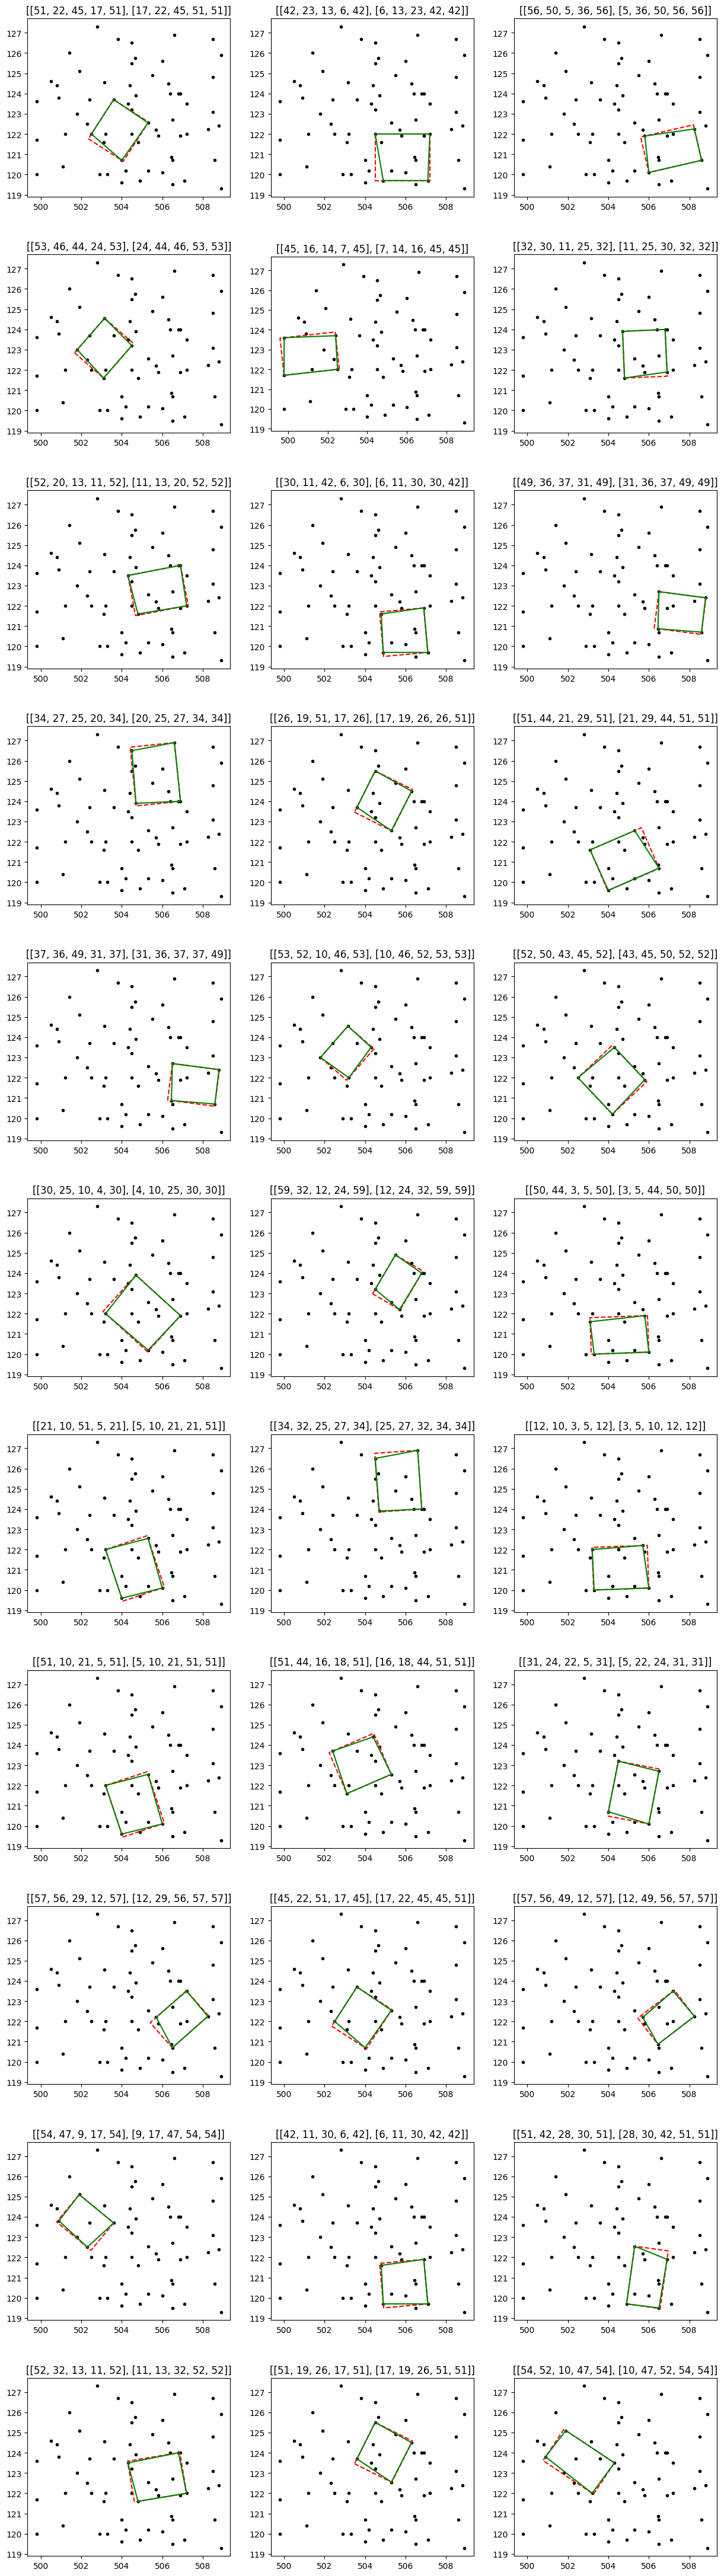

In [66]:
number_per_row = 3
fig, axs = plt.subplots(
    (0 if len(found_rects)%number_per_row==0 else 1) + len(found_rects)//number_per_row,
    number_per_row,
    figsize=(number_per_row*5, 1 + len(found_rects)//number_per_row*5))

rect_number = 0
for rect in found_rects:
    _, x, y = zip(*posts)
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, '.', color='black')

    x, y = rect.polygon.minimum_rotated_rectangle.exterior.coords.xy
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, "--", color='red')

    x, y = rect.polygon.exterior.coords.xy
    axs[rect_number//number_per_row, rect_number%number_per_row].plot(x, y, color='green')

    axs[rect_number//number_per_row, rect_number%number_per_row].set_title(str(rect))
    axs[rect_number//number_per_row, rect_number%number_per_row].set_aspect("equal")

    rect_number += 1